In [1]:
import pandas  as pd

df = pd.read_csv("Rdata.csv")

df.head()

Ïπ¥ÌéòÏù¥Î¶Ñ                                             review
0                      FFEE  ÏïÑÎ©îÎùºÏπ¥ÎÖ∏ ÏõêÎëê ÏÑ∏Í∞ÄÏßÄ Ï§ëÏóê Í≥†Î•º Ïàò ÏûàÏñ¥ÏÑú Ï∑®Ìñ•Ïóê ÎßûÍ≤å Î®πÏùÑ Ïàò ÏûàÏñ¥ Ï¢ãÏïÑÏöî. Î¨º...
1             MouseRabbitÏπ¥Ìéò  ÎÖ∏Ìä∏Î∂Å ÏûëÏóÖÌïòÍ∏∞ Ï¢ãÏùÄ Í≥≥Ïù¥ÏóêÏö©. ÏßÄÌïòÎäî Ï¢åÏãùÏù¥Í≥† Î∂ÑÏúÑÍ∏∞Í∞Ä Îã§Î•¥ÎÑ§Ïöî. Ï¢Ä Îçî Îî∞ÎúªÌïú ...
2  TAKEN COFFEE Í±¥ÎåÄÌõÑÎ¨∏Ï†êÏπ¥Ìéò,ÎîîÏ†ÄÌä∏  Ï†ÄÏùò ÏµúÏï†Ïª§ÌîºÏßëÏù¥ÏóêÏöî ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Ï¢ãÏïÑÏöî Ï†êÏã¨Ïóê Ìï≠ÏÉÅ Î∞îÏÅúÎç∞ÎèÑ Îäò ÏπúÏ†àÌï¥Ïöî\r\nÏùå...
3             TWG Tea ÏÑ±ÏàòÎÇôÎÇôÏ†ê  Î™®Îì† ÏÜåÌíàÎì§Ïù¥ twg Î°úÍ≥†Í∞Ä Î∞ïÌòÄÏûàÏñ¥ Ï†ïÎßê Í≥†Í∏âÏä§Îü¨ÏõåÏÑú ÎåÄÏ†ë Î∞õÎäî ÎäêÎÇåÏóê Îçî ÎßõÎÇòÍ≤å...
4                   Í±àÏπ¥Ìéò,ÎîîÏ†ÄÌä∏  Ï°∞ÏïÑÏöî Ïª§Ìîº ÎßõÏûàÏñ¥Ïöî! ÏºÄÏù¥ÌÅ¨ÎèÑ! ÏßÑÏßú ÏïÑÏßÄÌä∏Í∞ôÏùÄ Ïπ¥ÌéòÏóêÏó¨„Ö†„Ö†ÏµúÏï† Ï¢åÏÑùÏù¥ Ìé∏ÌïòÍ≥† ÏΩò...

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata.csv")

# ÏûÑÎ≤†Îî© Î™®Îç∏ Î°úÎìú
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

# Î∞©Î≤ï 1: Îã®Ïñ¥ Ï†úÍ±∞ ÌõÑ ÏûÑÎ≤†Îî©
stop_words = ['ÎÑàÎ¨¥', 'Ï¢ãÏïÑÏöî', 'ÎßõÏûàÏñ¥Ïöî', 'Ï†ïÎßê', 'Ï¢ãÍ≥†', 'ÎßõÏûàÍ≥†', 'ÏßÑÏßú', '„Öé„Öé']

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    # 5Îã®Ïñ¥ÎßàÎã§ Ï§ÑÎ∞îÍøà Ï∂îÍ∞Ä
    result = []
    for i, word in enumerate(filtered_words):
        result.append(word)
        if (i + 1) % 5 == 0:  # 5Îã®Ïñ¥ÎßàÎã§
            result.append('\n')
    return ' '.join(result)

# Ï†ÑÏ≤òÎ¶¨Îêú Î¶¨Î∑∞ ÏÉùÏÑ±
df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

# ÏûÑÎ≤†Îî© ÏÉùÏÑ±
print("ÏûÑÎ≤†Îî© ÏÉùÏÑ± Ï§ë...")
embeddings = []
for text in tqdm(df['filtered_review'], desc="ÏûÑÎ≤†Îî© Ï≤òÎ¶¨"):
    embedding = model.encode(text, show_progress_bar=False)
    embeddings.append(embedding.tolist())

# ÏûÑÎ≤†Îî© Ïó¥ Ï∂îÍ∞Ä
df['ÏûÑÎ≤†Îî©'] = embeddings

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Rdata_bert.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")

ÏûÑÎ≤†Îî© ÏÉùÏÑ± Ï§ë...


ÏûÑÎ≤†Îî© Ï≤òÎ¶¨: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 215/215 [00:11<00:00, 18.77it/s]


Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò: 215


In [5]:
df = pd.read_csv("Rdata_bert.csv")

df.head()

Ïπ¥ÌéòÏù¥Î¶Ñ  \
0                      FFEE   
1             MouseRabbitÏπ¥Ìéò   
2  TAKEN COFFEE Í±¥ÎåÄÌõÑÎ¨∏Ï†êÏπ¥Ìéò,ÎîîÏ†ÄÌä∏   
3             TWG Tea ÏÑ±ÏàòÎÇôÎÇôÏ†ê   
4                   Í±àÏπ¥Ìéò,ÎîîÏ†ÄÌä∏   

                                              review  \
0  ÏïÑÎ©îÎùºÏπ¥ÎÖ∏ ÏõêÎëê ÏÑ∏Í∞ÄÏßÄ Ï§ëÏóê Í≥†Î•º Ïàò ÏûàÏñ¥ÏÑú Ï∑®Ìñ•Ïóê ÎßûÍ≤å Î®πÏùÑ Ïàò ÏûàÏñ¥ Ï¢ãÏïÑÏöî. Î¨º...   
1  ÎÖ∏Ìä∏Î∂Å ÏûëÏóÖÌïòÍ∏∞ Ï¢ãÏùÄ Í≥≥Ïù¥ÏóêÏö©. ÏßÄÌïòÎäî Ï¢åÏãùÏù¥Í≥† Î∂ÑÏúÑÍ∏∞Í∞Ä Îã§Î•¥ÎÑ§Ïöî. Ï¢Ä Îçî Îî∞ÎúªÌïú ...   
2  Ï†ÄÏùò ÏµúÏï†Ïª§ÌîºÏßëÏù¥ÏóêÏöî ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Ï¢ãÏïÑÏöî Ï†êÏã¨Ïóê Ìï≠ÏÉÅ Î∞îÏÅúÎç∞ÎèÑ Îäò ÏπúÏ†àÌï¥Ïöî\r\nÏùå...   
3  Î™®Îì† ÏÜåÌíàÎì§Ïù¥ twg Î°úÍ≥†Í∞Ä Î∞ïÌòÄÏûàÏñ¥ Ï†ïÎßê Í≥†Í∏âÏä§Îü¨ÏõåÏÑú ÎåÄÏ†ë Î∞õÎäî ÎäêÎÇåÏóê Îçî ÎßõÎÇòÍ≤å...   
4  Ï°∞ÏïÑÏöî Ïª§Ìîº ÎßõÏûàÏñ¥Ïöî! ÏºÄÏù¥ÌÅ¨ÎèÑ! ÏßÑÏßú ÏïÑÏßÄÌä∏Í∞ôÏùÄ Ïπ¥ÌéòÏóêÏó¨„Ö†„Ö†ÏµúÏï† Ï¢åÏÑùÏù¥ Ìé∏ÌïòÍ≥† ÏΩò...   

                                     filtered_review  \
0  ÏïÑÎ©îÎùºÏπ¥ÎÖ∏ ÏõêÎëê ÏÑ∏Í∞ÄÏßÄ Ï§ëÏóê Í≥†Î•º \n Ïàò ÏûàÏñ¥ÏÑú Ï∑®Ìñ•Ïóê ÎßûÍ≤å Î®πÏùÑ \n Ïàò ÏûàÏñ¥ ...   
1  ÎÖ∏Ìä∏Î∂Å ÏûëÏóÖÌïòÍ∏∞ Ï¢ãÏùÄ Í≥≥Ïù¥ÏóêÏö©. ÏßÄÌïòÎäî \n Ï¢åÏãùÏù¥Í≥† Î∂ÑÏúÑÍ∏∞Í∞Ä Îã§Î•¥ÎÑ§Ïöî. Ï¢Ä Îçî \...   
2  Ï†ÄÏùò ÏµúÏï†Ïª§ÌîºÏßëÏù¥ÏóêÏöî Ï†êÏã¨Ïóê Ìï≠ÏÉÅ Î∞îÏÅúÎç∞ÎèÑ \n Îäò ÏπúÏ†àÌï¥Ïöî ÏùåÎ£å Î©îÎâ¥Í∞Ä ÏóÑÏ≤≠ \n...   
3  Î™®Îì† ÏÜåÌíàÎì§Ïù¥ twg Î°úÍ≥†Í∞Ä Î∞ïÌòÄÏûàÏñ¥ \n Í≥†Í∏âÏä§Îü¨ÏõåÏÑú ÎåÄÏ†ë Î∞õÎäî ÎäêÎÇåÏóê Îçî \n ...   
4  Ï°∞ÏïÑÏöî Ïª§Ìîº ÎßõÏûàÏñ¥Ïöî! ÏºÄÏù¥ÌÅ¨ÎèÑ! ÏïÑÏßÄÌä∏Í∞ôÏùÄ \n Ïπ¥ÌéòÏóêÏó¨„Ö†„Ö†ÏµúÏï† Ï¢åÏÑùÏù¥ Ìé∏ÌïòÍ≥† ÏΩò...   

                                                 ÏûÑÎ≤†Îî©  
0  [-1.1326961517333984, -0.7926070690155029, -0....  
1  [-0.444373220205307, -1.061728835105896, -0.45...  
2  [-0.7013822793960571, -0.9376376867294312, -0....  
3  [-1.0076357126235962, -0.8326747417449951, -0....  
4  [-0.6524172425270081, -0.9057363271713257, -0....

Îç∞Ïù¥ÌÑ∞ Ïàò: 215
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768
1. K-Means Clustering ÏàòÌñâ Ï§ë...
2. Spectral Clustering ÏàòÌñâ Ï§ë...
3. Hierarchical Clustering ÏàòÌñâ Ï§ë...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


4. DBSCAN ÏàòÌñâ Ï§ë...
Í≤∞Í≥ºÍ∞Ä 'Rdata_clustered_all.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ ===

KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:
KMeans
0    25
1    66
2    36
3    39
4    49
Name: count, dtype: int64

Spectral ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:
Spectral
0    23
1    64
2    59
3    37
4    32
Name: count, dtype: int64

Hierarchical ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:
Hierarchical
0    50
1    69
2    59
3    16
4    21
Name: count, dtype: int64

DBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:
DBSCAN
0    215
Name: count, dtype: int64


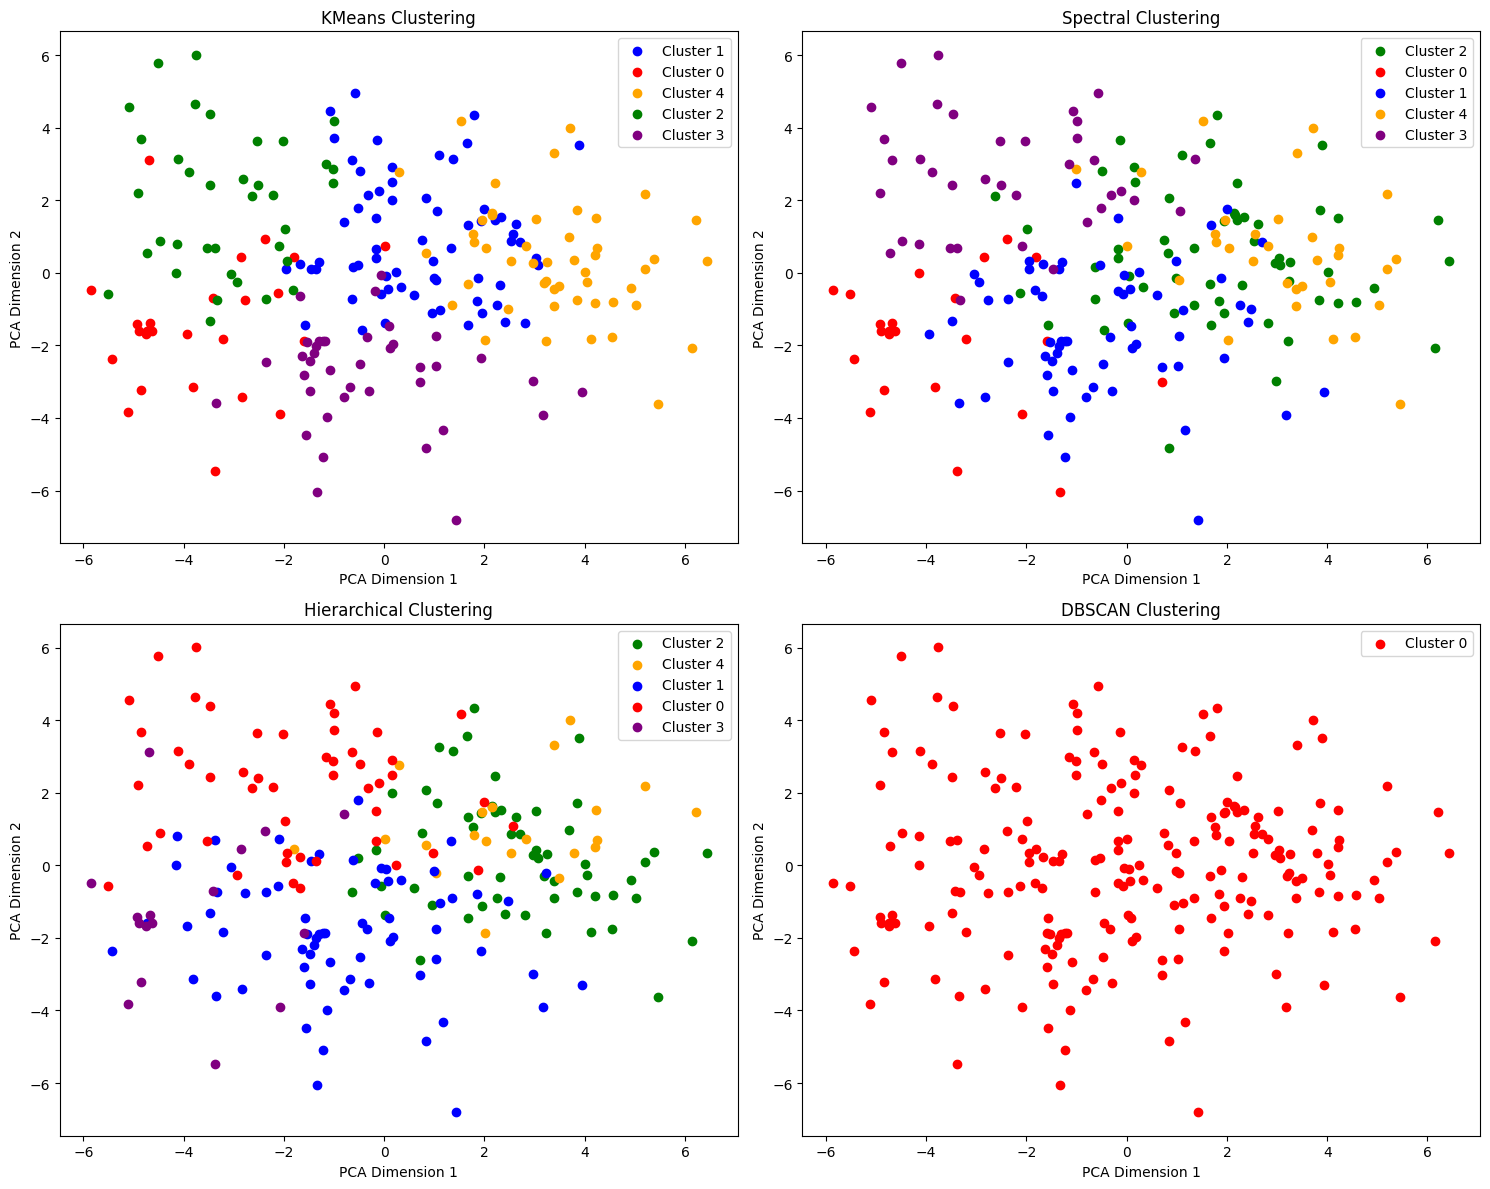


=== Spectral Clustering Í≤∞Í≥º ÏÉòÌîå ===

--- Cluster 0 ---
1. ÎÖ∏Ìä∏Î∂Å ÏûëÏóÖÌïòÍ∏∞ Ï¢ãÏùÄ Í≥≥Ïù¥ÏóêÏö©. ÏßÄÌïòÎäî 
 Ï¢åÏãùÏù¥Í≥† Î∂ÑÏúÑÍ∏∞Í∞Ä Îã§Î•¥ÎÑ§Ïöî. Ï¢Ä Îçî 
 Îî∞ÎúªÌïú ÎäêÎÇå ! ÏïàÏ™ΩÏóê Îã®Ï≤¥Î°ú 
 ÏïâÏùÑ Ïàò ÏûàÎäî ÍµâÏû•Ìûà ÌîÑÎùºÏù¥ÎπóÌïú 
 ÏûêÎ¶¨Í∞Ä ÏûàÏñ¥ÏÑú Îã¥Ïóê Î™®ÏûÑÏûàÏùÑ Îïå 
 ÏùºÎ£® ÏôÄÏïºÍ≤†Îã§Íµ¨ Îã§Ïßê„ÄÇ„ÄÇ„ÄÇ 250406 Ïò§Îäò 
 Ïò§ÎûúÎßåÏóê ÎßàÏö∞Ïä§ÎûòÎπó Î∞©Î¨∏ÌñàÏñ¥Ïöî~ ÏΩòÏÑúÌä∏ ÎÅùÎÇòÍ≥† 
 ÏôîÏñ¥Ïöî~Ïù¥Î≤àÎã¨ ÏòàÏÑ±Ïò§Îπ† ÏΩòÏÑúÌä∏ Î≥¥Í≥† ÎòêÏò¨Í≤åÏöî~~ 
 ÏÉàÎ°úÏö¥ ÏºÄÏù¥ÌÅ¨ÎèÑ ÎßõÏûàÏñ¥Ïöî!! 250420 ÏòàÏÑ±Ïò§Îπ† 
 ÏΩòÏÑúÌä∏ ÎÅùÎÇòÍ≥† ÎßàÏö∞Ïä§ÎûòÎπó ÏôîÏñ¥Ïöî~ ÎßõÏûàÏñ¥ÏÑú 
 Îã§Î®πÍ≥† Ï∞çÏóàÎÑ§Ïöî~~ Îî∏Í∏∞ÏöîÍ±∞Ìä∏ Ï∂îÍ∞ÄÌï¥ÏÑú Î®πÏñ¥Ïöî!! 
 Í≥†ÏñëÏù¥ÌÇ§ÎßÅÎèÑ Í∑ÄÏó¨ÏõåÏÑú ÏÇ¨Í∞ÄÏöî~ ÏûêÏ£º Í∞ÄÍ≥† 
 ÏûàÎäî Ïπ¥ÌéòÏù∏Îç∞ ÏßÄÌïòÍ∞Ä ÏïÑÎäëÌïòÍ≥† ÏùåÎ£åÎèÑ 
 ÎßõÏûàÏñ¥ÏÑú Î∞îÎ°ú Ìò∏Î°úÎ°ù Î®πÏóàÏñ¥Ïöî ÏñëÏù¥ 
 ÎßéÏßÑÏïäÏùå~ Ïò§ÎûúÎßåÏóê ÏäàÏ£ºÏòàÏÑ±Ïò§Îπ†Ïπ¥Ìéò Îì§Î†∏Ïñ¥Ïöî~ Ìï≠ÏÉÅÏπúÏ†àÌïòÍ≥† 
 Íπ®ÎÅóÌï¥ÏÑú Ï¢ãÏïÑÏöî~~ Ïò§ÎäòÎèÑ Ïò§ÎûúÎßåÏóê ÏäàÏ£ºÏòàÏÑ±Ïò§

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata_bert.csv")

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
embeddings = np.array([eval(emb) for emb in df['ÏûÑÎ≤†Îî©']])

print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")

# 1. K-Means Clustering
print("1. K-Means Clustering ÏàòÌñâ Ï§ë...")
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans'] = kmeans.fit_predict(embeddings)

# 2. Spectral Clustering
print("2. Spectral Clustering ÏàòÌñâ Ï§ë...")
similarity_matrix = cosine_similarity(embeddings)
spectral = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
df['Spectral'] = spectral.fit_predict(similarity_matrix)

# 3. Hierarchical Clustering (Agglomerative)
print("3. Hierarchical Clustering ÏàòÌñâ Ï§ë...")
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

# 4. DBSCAN
print("4. DBSCAN ÏàòÌñâ Ï§ë...")
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['DBSCAN'] = dbscan.fit_predict(embeddings)

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Rdata_clustered_all.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Í≤∞Í≥ºÍ∞Ä '{output_file}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ ===")
clustering_methods = ['KMeans', 'Spectral', 'Hierarchical', 'DBSCAN']

for method in clustering_methods:
    print(f"\n{method} ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:")
    print(df[method].value_counts().sort_index())

# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå (ÏãúÍ∞ÅÌôîÏö©)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, method in enumerate(clustering_methods):
    ax = axes[i]
    unique_clusters = df[method].unique()
    
    for cluster in unique_clusters:
        if cluster == -1:  # DBSCAN ÎÖ∏Ïù¥Ï¶à
            cluster_points = reduced_embeddings[df[method] == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c='black', marker='x', s=50, label='Noise')
        else:
            cluster_points = reduced_embeddings[df[method] == cluster]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[cluster % len(colors)], label=f'Cluster {cluster}')
    
    ax.set_title(f'{method} Clustering')
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.legend()

plt.tight_layout()
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Ï∂úÎ†• (Spectral Clustering Í∏∞Ï§Ä)
print("\n=== Spectral Clustering Í≤∞Í≥º ÏÉòÌîå ===")
for cluster in sorted(df['Spectral'].unique()):
    print(f"\n--- Cluster {cluster} ---")
    cluster_reviews = df[df['Spectral'] == cluster]['filtered_review'].head(3)
    for i, review in enumerate(cluster_reviews):
        print(f"{i+1}. {review}")

----------

Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Î¨∂ÏòÄÎäîÏßÄ Ïïå Ïàò ÏûàÎÉêÍ≥† Î¨ºÏñ¥Î¥Ñ


In [10]:
# Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print("Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïª¨ÎüºÎ™Ö:")
print(df.columns.tolist())

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïª¨ÎüºÎ™Ö:
['Ïπ¥ÌéòÏù¥Î¶Ñ', 'review', 'filtered_review', 'ÏûÑÎ≤†Îî©', 'DBSCAN_Auto', 'MeanShift', 'AffinityProp']


Îç∞Ïù¥ÌÑ∞ Ïàò: 215
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768
1. K-Means Clustering ÏàòÌñâ Ï§ë...
2. Spectral Clustering ÏàòÌñâ Ï§ë...
3. Hierarchical Clustering ÏàòÌñâ Ï§ë...
4. DBSCAN ÏàòÌñâ Ï§ë...

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===

--- KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---
Cluster 0 (25Í∞ú): ÏºÄÏù¥ÌÅ¨, Î†àÌÑ∞ÎßÅ, ÏºÄÏù¥ÌÅ¨Í∞Ä, ÏºÄÏù¥ÌÅ¨ÎèÑ, ÎîîÏûêÏù∏ÎèÑ, Í∏âÌïòÍ≤å, ÏÇ¨Ïû•Îãò, ÏòàÏÅòÍ≤å
Cluster 1 (31Í∞ú): ÎπµÏù¥, ÏÉåÎìúÏúÑÏπò, Î≤†Ïù¥Í∏Ä, ÎπµÎèÑ, Î≤†Ìä∏ÎÇ®, ÎßõÏûàÍ≤å, ÏÉêÎü¨Îìú, ÏàòÌîåÎ†à
Cluster 2 (18Í∞ú): ÏôÄÌîå, ÏöîÍ±∞Ìä∏, Î∞ÄÌÅ¨Ìã∞, Í∑∏Î¶≠ÏöîÍ±∞Ìä∏, ÏïÑÏù¥Ïä§ÌÅ¨Î¶º, ÎßõÏù¥, ÎßõÏûàÏóàÏñ¥Ïöî, ÎßõÏûàÎÑ§Ïöî
Cluster 3 (29Í∞ú): Ïª§Ìîº, Ïª§ÌîºÎèÑ, Î∂ÑÏúÑÍ∏∞, Ï¢ãÏùÄ, Î∂ÑÏúÑÍ∏∞ÎèÑ, ÎÑìÍ≥†, Ïª§ÌîºÍ∞Ä, ÏûàÏñ¥ÏÑú
Cluster 4 (17Í∞ú): ÏóêÍ∑∏ÌÉÄÎ•¥Ìä∏, Î∏åÎü∞Ïπò, ÎßùÍ≥†, ÏûàÏñ¥ÏÑú, Î∞ÄÌÅ¨Ìã∞, ÎßõÏûàÏñ¥ÏÑú, ÎßõÏûàÍ≤å, ÎßùÍ≥†ÎπôÏàò
Cluster 5 (26Í∞ú): Ïª§Ìîº, Î∂ÑÏúÑÍ∏∞ÎèÑ, Î∂ÑÏúÑÍ∏∞, Ïª§ÌîºÍ∞Ä, Ïª§ÌîºÎèÑ, ÏûàÏñ¥ÏÑú, ÎîîÏ†ÄÌä∏, ÎîîÏ†ÄÌä∏ÎèÑ
Cluster 6 (30Í∞ú): Ïª§Ìîº, Í∞ÄÏÑ±ÎπÑ, ÎÑìÍ≥†, ÏπúÏ†àÌï¥Ïöî, 

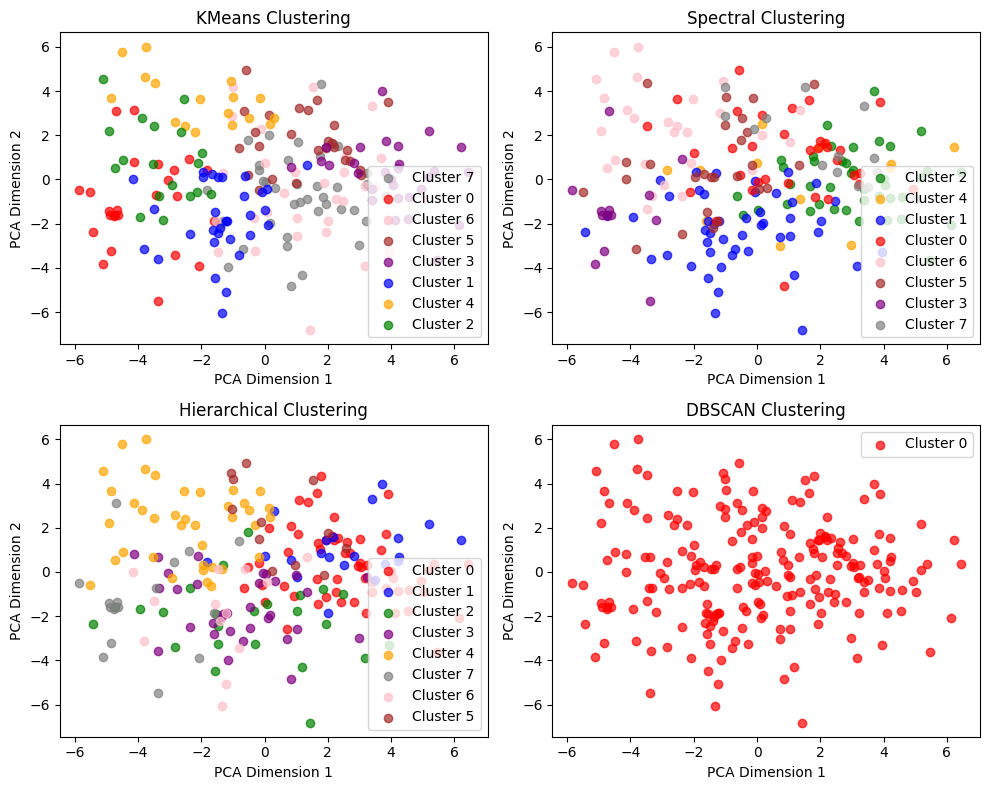


=== Spectral ÏÉÅÏÑ∏ Î∂ÑÏÑù ===

--- Cluster 0 ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---
Îç∞Ïù¥ÌÑ∞ Ïàò: 33Í∞ú
Ï£ºÏöî Ïπ¥Ìéò: TWG Tea ÏÑ±ÏàòÎÇôÎÇôÏ†ê, Î∏åÎ£®ÌÅ¨ ÏÑ±ÏàòÏ†ê, ÌÇ®Î≥¥Ïù¥ÏÑúÏö∏
ÏÉòÌîå Î¶¨Î∑∞:
  1. Î™®Îì† ÏÜåÌíàÎì§Ïù¥ twg Î°úÍ≥†Í∞Ä Î∞ïÌòÄÏûàÏñ¥ 
 Í≥†Í∏âÏä§Îü¨ÏõåÏÑú ÎåÄÏ†ë Î∞õÎäî ÎäêÎÇåÏóê Îçî 
 ÎßõÎÇòÍ≤å Í∏∞Î∂ÑÏ¢ãÍ≤å Î®πÏóàÏäµÎãàÎã§ ÌÉÄÏûÑÎ¶¨Ïä§ ÌôçÏ∞®ÎèÑ 
 ÎÑò~Ìñ•Í∏∞Î°≠Í≥† ÎßõÎÇ¨Ïñ¥Ïöî. Î¶¨Ï°∞ÎòêÍ∞Ä ÎäêÎÅºÌï† ÏØ§ 
 ÌïúÏûÖ ÎßàÏãúÎ©¥ Îã§Ïãú Î¶¨ÌîÑÎ†àÏãú ÎêòÎäî 
 ÎäêÎÇå~ Ïñ¥Î≤ÑÏù¥ÎÇ†Ïù¥Îùº Îî∏ÎçïÎ∂ÑÏóê ÏôîÎäîÎç∞ Î™®Îì† 
 Í≤å ÎßåÏ°±Ïä§Îü¨Ïõ†Ïñ¥Ïöî. ÎîîÏ†ÄÌä∏Î°ú ÎßàÏπ¥Î°±ÎèÑ Î®πÏóàÎäîÎç∞ 
 ÏßÄÍ∏àÍπåÏßÄ Î®πÏùÄ ÎßàÏπ¥Î°±ÏùÄ ÏïÑÎ¨¥Í≤ÉÎèÑ ÏïÑÎãàÍµ¨ÎÇò 
 ÌïòÎäî ÎßõÏù¥ÏóàÏñ¥Ïöî Îàà ÎÇ¥Î¶¨Îäî ÏàòÏöîÏùº. 
 ÌäπÎ≥ÑÌïú Ïû•ÏÜåÏóêÏÑúÏùò ÎßåÎÇ®ÏùÑ ÏúÑÌïú ÏòàÏïΩÌïú 
 Ïû•ÏÜåÏûÖÎãàÎã§. ÏßÄÌïò B3 Ï£ºÏ∞®Ïû•Ïóê Ï£ºÏ∞® 
 ÌõÑ ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ 1Ï∏µÏóê ÎÇ¥Î†§ 
 Î∞ñÏúºÎ°ú ÎÇòÏò§Î©¥ Ï†ïÎ©¥Ïóê ÏúÑÏπòÌïú Ïù¥Í≥≥ÏùÄ 
 ÏßÄÏÉÅÏóê 1Ï∏µÏóê ÏúÑÏπòÌïú Ïû•ÏÜå ÏûÖÎãàÎã§. 
 ÏÉêÎü¨ÎìúÎäî Î¨∏Ïñ¥Í∞Ä Îì§Ïñ¥Í∞ÑÍ≤ÉÏùÑ Ï£ºÎ¨∏ ÌñàÎäîÎç

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['ÏûÑÎ≤†Îî©']])

print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
print("1. K-Means Clustering ÏàòÌñâ Ï§ë...")
kmeans = KMeans(n_clusters=8, random_state=42)
df['KMeans'] = kmeans.fit_predict(embeddings)

print("2. Spectral Clustering ÏàòÌñâ Ï§ë...")
similarity_matrix = cosine_similarity(embeddings)
spectral = SpectralClustering(n_clusters=8, affinity='precomputed', random_state=42)
df['Spectral'] = spectral.fit_predict(similarity_matrix)

print("3. Hierarchical Clustering ÏàòÌñâ Ï§ë...")
hierarchical = AgglomerativeClustering(n_clusters=8, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

print("4. DBSCAN ÏàòÌñâ Ï§ë...")
dbscan = DBSCAN(eps=1, min_samples=5, metric='cosine')
df['DBSCAN'] = dbscan.fit_predict(embeddings)

print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===")

# TF-IDF Î≤°ÌÑ∞Ìôî
stop_words = ['ÎÑàÎ¨¥', 'Ï¢ãÏïÑÏöî', 'ÎßõÏûàÏñ¥Ïöî', 'Ï†ïÎßê', 'Ï¢ãÍ≥†', 'ÎßõÏûàÍ≥†', 'ÏßÑÏßú', '„Öé„Öé', 'Í∞ÄÍ≤å', 'Ïπ¥Ìéò', 'Í≥≥']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∞©Î≤ïÎì§ (Í∏∞Ï°¥ + ÏÉàÎ°ú Ï∂îÍ∞ÄÎêú Í≤ÉÎì§)
clustering_methods = ['KMeans', 'Spectral', 'Hierarchical', 'DBSCAN', 'DBSCAN_Auto', 'MeanShift', 'AffinityProp']

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
existing_methods = [method for method in clustering_methods if method in df.columns]

for method in existing_methods:
    print(f"\n--- {method} ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---")
    
    unique_clusters = df[method].unique()
    # -1 (ÎÖ∏Ïù¥Ï¶à)Í∞Ä ÏûàÏúºÎ©¥ Ï†úÏô∏ÌïòÍ≥† Ï†ïÎ†¨
    valid_clusters = sorted([c for c in unique_clusters if c != -1])
    if -1 in unique_clusters:
        valid_clusters.append(-1)
    
    for cluster in valid_clusters:
        if cluster == -1:
            noise_count = len(df[df[method] == cluster])
            print(f"Cluster {cluster}: [ÎÖ∏Ïù¥Ï¶à Îç∞Ïù¥ÌÑ∞ {noise_count}Í∞ú]")
            continue
            
        cluster_indices = df[df[method] == cluster].index
        
        if len(cluster_indices) == 0:
            continue
            
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        cluster_size = len(cluster_indices)
        print(f"Cluster {cluster} ({cluster_size}Í∞ú): {', '.join(top_keywords)}")

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Rdata_clustered_all.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nÍ≤∞Í≥ºÍ∞Ä '{output_file}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ ===")

for method in existing_methods:
    print(f"\n{method} ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨:")
    print(df[method].value_counts().sort_index())

# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå (ÏãúÍ∞ÅÌôîÏö©)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# ÏãúÍ∞ÅÌôî - Ï°¥Ïû¨ÌïòÎäî Î∞©Î≤ïÎì§Îßå
if existing_methods:
    n_methods = len(existing_methods)
    
    # 2x2 ÎòêÎäî Ï†ÅÏ†àÌïú ÌÅ¨Í∏∞Î°ú Ï°∞Ï†ï
    if n_methods <= 4:
        rows, cols = 2, 2
    elif n_methods <= 6:
        rows, cols = 2, 3
    else:
        rows, cols = 3, 3
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    if n_methods == 1:
        axes = [axes]
    else:
        axes = axes.ravel()
    
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    
    for i, method in enumerate(existing_methods):
        if i >= len(axes):
            break
            
        ax = axes[i]
        unique_clusters = df[method].unique()
        
        for cluster in unique_clusters:
            cluster_points = reduced_embeddings[df[method] == cluster]
            if cluster == -1: 
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c='black', marker='x', s=50, label='Noise')
            else:
                ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=colors[cluster % len(colors)], label=f'Cluster {cluster}', alpha=0.7)
        
        ax.set_title(f'{method} Clustering')
        ax.set_xlabel('PCA Dimension 1')
        ax.set_ylabel('PCA Dimension 2')
        ax.legend()
    
    # Îπà subplot Ïà®Í∏∞Í∏∞
    for i in range(n_methods, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# ÏÉÅÏÑ∏ Î∂ÑÏÑù - Í∞ÄÏû• Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º Î≥¥Ïù¥Îäî Î∞©Î≤ï ÏÑ†ÌÉù
best_method = 'Spectral' if 'Spectral' in existing_methods else existing_methods[0]

print(f"\n=== {best_method} ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
for cluster in sorted(df[best_method].unique()):
    print(f"\n--- Cluster {cluster} ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---")
    cluster_data = df[df[best_method] == cluster]
    
    print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(cluster_data)}Í∞ú")
    
    # Ïπ¥ÌéòÏù¥Î¶Ñ Ïª¨Îüº ÏÇ¨Ïö©
    if len(cluster_data) > 0:
        top_cafes = cluster_data['Ïπ¥ÌéòÏù¥Î¶Ñ'].value_counts().head(3)
        print(f"Ï£ºÏöî Ïπ¥Ìéò: {', '.join(top_cafes.index.tolist())}")
        
        print("ÏÉòÌîå Î¶¨Î∑∞:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

print(f"\n=== Ï†ÑÏ≤¥ Ïª¨Îüº Ï†ïÎ≥¥ ===")
print(f"Ïª¨ÎüºÎ™Ö: {df.columns.tolist()}")
print(f"Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: {df.shape}")

----------------

ÏàòÏßÅÌòï ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÎßå

Îß• ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!
Îç∞Ïù¥ÌÑ∞ Ïàò: 215
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768

=== Hierarchical Clustering (n_clusters=7) ÏàòÌñâ ===
Ïã§Î£®Ïó£ Ï†êÏàò: 0.034

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===

üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÏÉÅÏÑ∏ Î∂ÑÏÑù
üìä Îç∞Ïù¥ÌÑ∞ Ïàò: 56Í∞ú
üîë Ï£ºÏöî ÌÇ§ÏõåÎìú: Ïª§Ìîº, Í∞ÄÏÑ±ÎπÑ, ÏûêÏ£º, Ïª§ÌîºÎèÑ, ÏïÑÏù¥Ïä§ÌÅ¨Î¶º, ÏπúÏ†àÌï¥Ïöî, ÎßõÏûàÍ≤å, ÏûàÏñ¥ÏÑú, Ìï≠ÏÉÅ, Ïª§ÌîºÍ∞Ä

üè™ Ìè¨Ìï®Îêú Ïπ¥Ìéò Î™©Î°ù (Ï¥ù 56Í∞ú Ïπ¥Ìéò):
    1. TAKEN COFFEE Í±¥ÎåÄÌõÑÎ¨∏Ï†êÏπ¥Ìéò,ÎîîÏ†ÄÌä∏: 1Í∞ú Î¶¨Î∑∞
    2. Í≥†ÎßùÍ≥† Í±¥ÎåÄÏ†ê: 1Í∞ú Î¶¨Î∑∞
    3. ÎπôÎèôÎåï ÌîÑÎ¶¨ÎØ∏ÏóÑ ÎπôÏàòÏπ¥Ìéò Í±¥ÎåÄÏ†êÎπôÏàò: 1Í∞ú Î¶¨Î∑∞
    4. ÎπΩÎã§Î∞© Í±¥ÎåÄÎ°úÎç∞Ïò§Ï†êÌÖåÏù¥ÌÅ¨ÏïÑÏõÉÏª§Ìîº: 1Í∞ú Î¶¨Î∑∞
    5. ÎπΩÎã§Î∞© ÏûêÏñëÏ†ÑÌÜµÏãúÏû•Ï†êÌÖåÏù¥ÌÅ¨ÏïÑÏõÉÏª§Ìîº: 1Í∞ú Î¶¨Î∑∞
    6. ÏÑ§Îπô ÏÑ∏Ï¢ÖÎåÄÏ†ê: 1Í∞ú Î¶¨Î∑∞
    7. ÏäàÎ∏åÏ†ú: 1Í∞ú Î¶¨Î∑∞
    8. Ïä§ÏπºÎùºÎòêÏïÑÏù¥Ïä§ÌÅ¨Î¶º: 1Í∞ú Î¶¨Î∑∞
    9. Ïä§ÌÉÄÎ≤ÖÏä§ Í±¥ÎåÄÏä§ÌÉÄÏãúÌã∞Ï†ê: 1Í∞ú Î¶¨Î∑∞
   10. Ïä§ÌÉÄÎ≤ÖÏä§ Í±¥ÎåÄÌõÑÎ¨∏Ï†ê: 1Í∞ú Î¶¨Î∑∞
   11. Ïä§ÌÉÄ

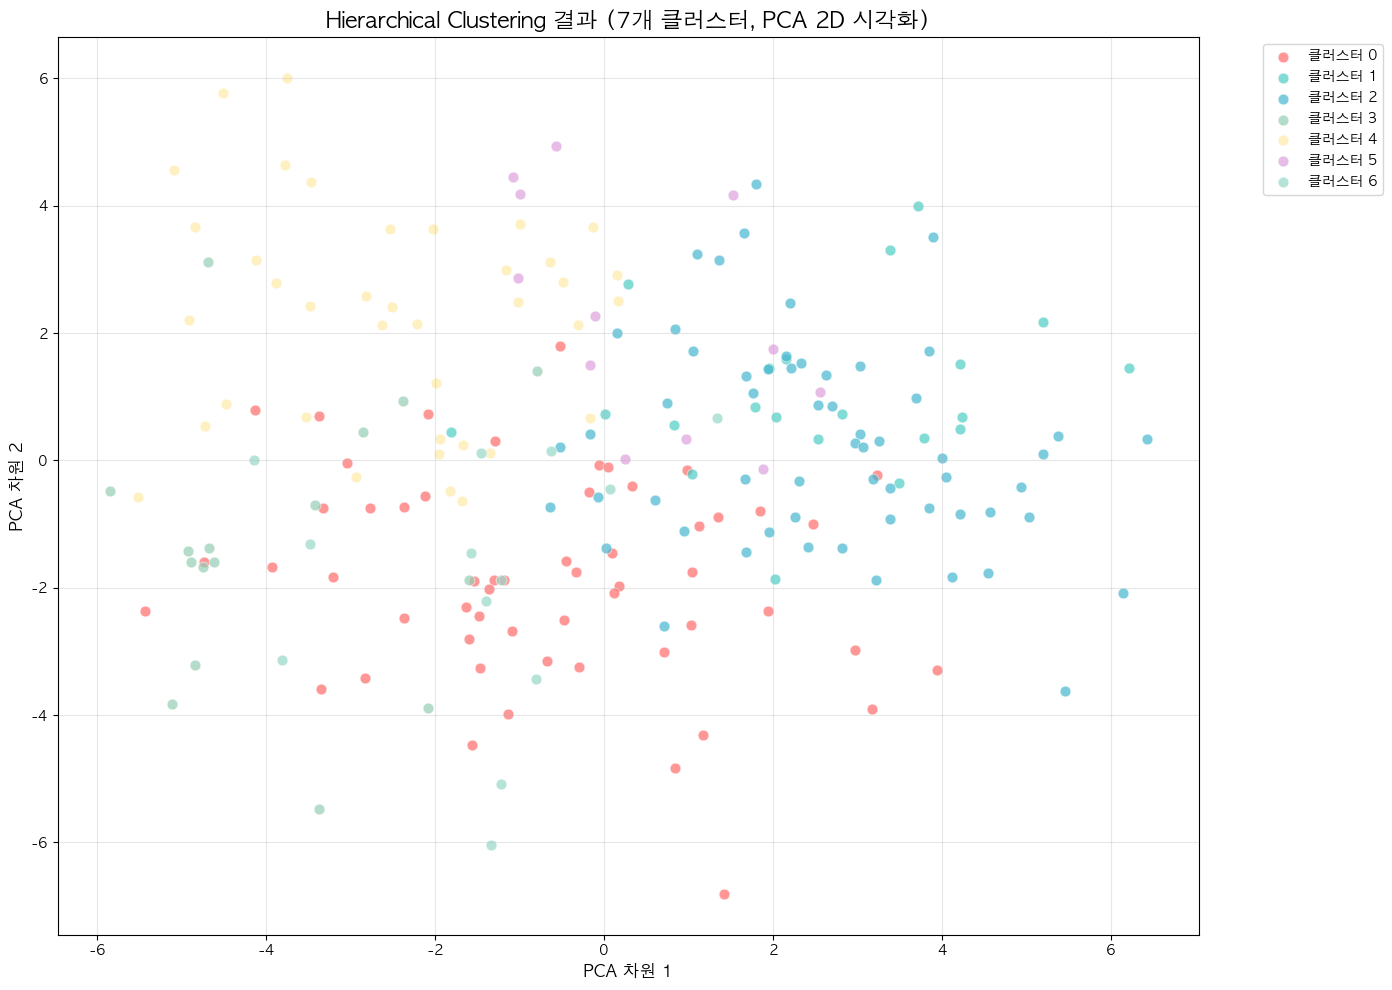


üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
      Í≥†Ïú†_Ïπ¥Ìéò_Ïàò  Ï†ÑÏ≤¥_Î¶¨Î∑∞_Ïàò  Ïπ¥ÌéòÎãπ_ÌèâÍ∑†_Î¶¨Î∑∞
ÌÅ¥Îü¨Ïä§ÌÑ∞                             
0          56       56        1.0
1          21       21        1.0
2          59       59        1.0
3          16       16        1.0
4          38       38        1.0
5          12       12        1.0
6          13       13        1.0

üîç ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÇ§ÏõåÎìú ÏöîÏïΩ
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (56Í∞ú): Ïª§Ìîº, Í∞ÄÏÑ±ÎπÑ, ÏûêÏ£º, Ïª§ÌîºÎèÑ, ÏïÑÏù¥Ïä§ÌÅ¨Î¶º
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (21Í∞ú): Ïª§Ìîº, ÎÑìÍ≥†, ÏûàÏñ¥ÏÑú, Ïª§ÌîºÎèÑ, Ï¢ãÏùÄ
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (59Í∞ú): Ïª§Ìîº, Ïª§ÌîºÎèÑ, Î∂ÑÏúÑÍ∏∞ÎèÑ, Î∂ÑÏúÑÍ∏∞, ÎÑìÍ≥†
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 (16Í∞ú): ÏºÄÏù¥ÌÅ¨, ÏºÄÏù¥ÌÅ¨Í∞Ä, ÏºÄÏù¥ÌÅ¨ÎèÑ, Î†àÌÑ∞ÎßÅ, ÏòàÏÅòÍ≤å
ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 (38Í∞ú): Î∞ÄÌÅ¨Ìã∞, ÎßõÏûàÍ≤å, ÎßõÏûàÏóàÏñ¥Ïöî, ÏóêÍ∑∏ÌÉÄÎ•¥Ìä∏, ÎßõÏûàÏñ¥ÏÑú
ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 (12Í∞ú): Ïª§Ìîº, Í∞ÄÏÑ±ÎπÑ, Ïä§ÌÉÄÎ≤ÖÏä§, ÎÑìÍ≥†, Îß§Ïû•Ïù¥
ÌÅ¥Îü¨Ïä§ÌÑ∞ 6 (13Í∞ú): ÎπµÏù¥, Î≤†Ìä∏ÎÇ®, ÏÉåÎìúÏúÑÏπò, ÏÉêÎü¨Îìú, ÎπµÎèÑ

üíæ Í≤∞Í≥ºÍ∞Ä 'Hierarchica

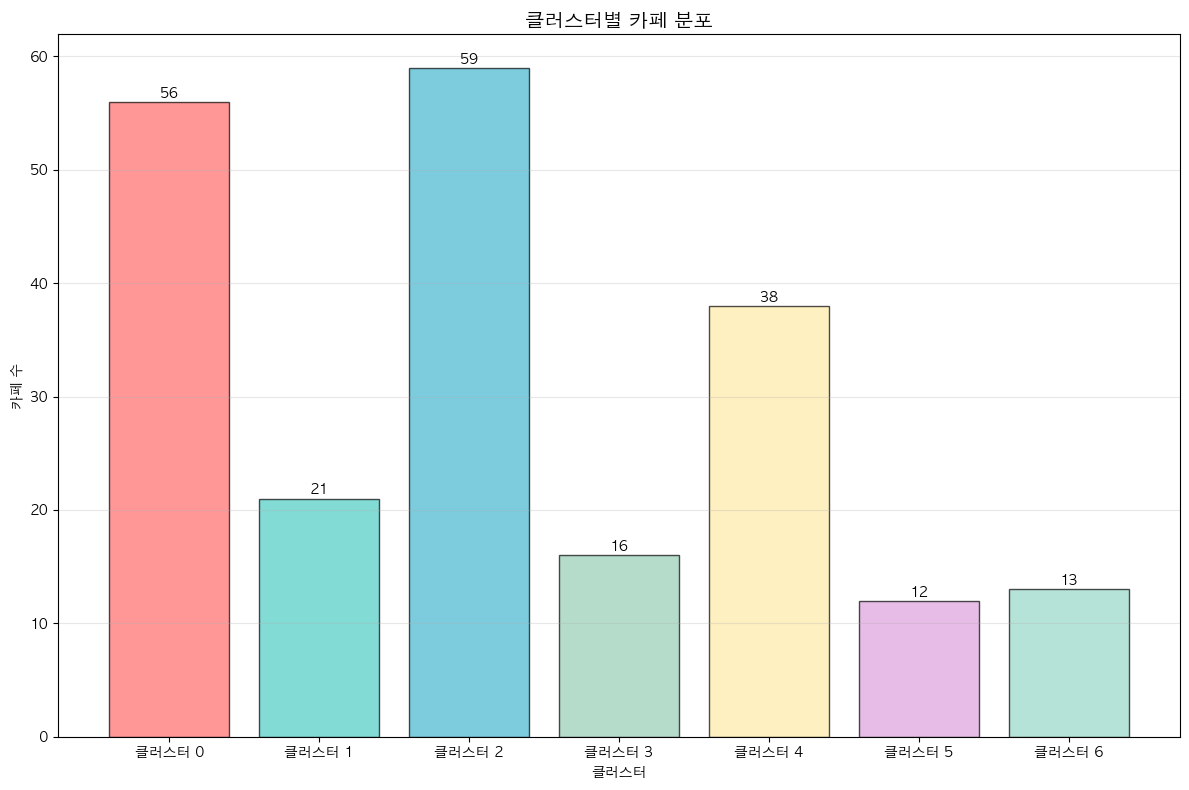

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Îß• ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    """Îß•ÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï"""
    if platform.system() == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
        plt.rcParams['axes.unicode_minus'] = False
        print("Îß• ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!")
    else:
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ï†ÅÏö©
set_korean_font()

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['ÏûÑÎ≤†Îî©']])

print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ•º 7Í∞úÎ°ú Í≥†Ï†ï
n_clusters = 7
print(f"\n=== Hierarchical Clustering (n_clusters={n_clusters}) ÏàòÌñâ ===")

# Hierarchical Clustering ÏàòÌñâ
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] = hierarchical.fit_predict(embeddings)

# Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
silhouette_avg = silhouette_score(embeddings, df['ÌÅ¥Îü¨Ïä§ÌÑ∞'])
print(f"Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")

# TF-IDF Î≤°ÌÑ∞ÌôîÎ°ú ÌÇ§ÏõåÎìú Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===")
stop_words = ['ÎÑàÎ¨¥', 'Ï¢ãÏïÑÏöî', 'ÎßõÏûàÏñ¥Ïöî', 'Ï†ïÎßê', 'Ï¢ãÍ≥†', 'ÎßõÏûàÍ≥†', 'ÏßÑÏßú', '„Öé„Öé', 'Í∞ÄÍ≤å', 'Ïπ¥Ìéò', 'Í≥≥', 'Ïó¨Í∏∞', 'Ïù¥Í≥≥']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
for cluster in sorted(df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()):
    print(f"\n{'='*50}")
    print(f"üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ÏÉÅÏÑ∏ Î∂ÑÏÑù")
    print(f"{'='*50}")
    
    cluster_data = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster]
    cluster_indices = cluster_data.index
    
    print(f"üìä Îç∞Ïù¥ÌÑ∞ Ïàò: {len(cluster_data)}Í∞ú")
    
    # ÌäπÏÑ± ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
    if len(cluster_indices) > 0:
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:10]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        print(f"üîë Ï£ºÏöî ÌÇ§ÏõåÎìú: {', '.join(top_keywords)}")
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ìè¨Ìï®Îêú Ïπ¥ÌéòÎì§
    cafe_counts = cluster_data['Ïπ¥ÌéòÏù¥Î¶Ñ'].value_counts()
    print(f"\nüè™ Ìè¨Ìï®Îêú Ïπ¥Ìéò Î™©Î°ù (Ï¥ù {len(cafe_counts)}Í∞ú Ïπ¥Ìéò):")
    for i, (cafe, count) in enumerate(cafe_counts.items()):
        print(f"   {i+1:2d}. {cafe}: {count}Í∞ú Î¶¨Î∑∞")
    
    # ÎåÄÌëú Î¶¨Î∑∞ 3Í∞ú
    print(f"\nüìù ÎåÄÌëú Î¶¨Î∑∞:")
    sample_reviews = cluster_data['filtered_review'].head(3)
    for i, review in enumerate(sample_reviews):
        print(f"   {i+1}. {review[:100]}..." if len(review) > 100 else f"   {i+1}. {review}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ
print(f"\n{'='*60}")
print("üìà Hierarchical Clustering Í≤∞Í≥º ÏöîÏïΩ")
print(f"{'='*60}")
cluster_summary = df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].value_counts().sort_index()
for cluster, count in cluster_summary.items():
    percentage = (count / len(df)) * 100
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}: {count:3d}Í∞ú ({percentage:5.1f}%)")

# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

unique_clusters = df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()
for i, cluster in enumerate(sorted(unique_clusters)):
    cluster_points = reduced_embeddings[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i % len(colors)], label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}', 
               alpha=0.7, s=60, edgecolors='white', linewidth=0.5)

plt.title('Hierarchical Clustering Í≤∞Í≥º (7Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞, PCA 2D ÏãúÍ∞ÅÌôî)', fontsize=16, fontweight='bold')
plt.xlabel('PCA Ï∞®Ïõê 1', fontsize=12)
plt.ylabel('PCA Ï∞®Ïõê 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
print(f"\n{'='*60}")
print("üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ")
print(f"{'='*60}")

cluster_stats = df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞').agg({
    'Ïπ¥ÌéòÏù¥Î¶Ñ': ['nunique', 'count'],
    'filtered_review': 'count'
}).round(2)

cluster_stats.columns = ['Í≥†Ïú†_Ïπ¥Ìéò_Ïàò', 'Ï†ÑÏ≤¥_Î¶¨Î∑∞_Ïàò', 'Î¶¨Î∑∞_Ïàò_ÌôïÏù∏']
cluster_stats = cluster_stats.drop('Î¶¨Î∑∞_Ïàò_ÌôïÏù∏', axis=1)
cluster_stats['Ïπ¥ÌéòÎãπ_ÌèâÍ∑†_Î¶¨Î∑∞'] = (cluster_stats['Ï†ÑÏ≤¥_Î¶¨Î∑∞_Ïàò'] / cluster_stats['Í≥†Ïú†_Ïπ¥Ìéò_Ïàò']).round(1)

print(cluster_stats)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÇ§ÏõåÎìú ÏöîÏïΩÌëú
print(f"\n{'='*60}")
print("üîç ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÇ§ÏõåÎìú ÏöîÏïΩ")
print(f"{'='*60}")

for cluster in sorted(df['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()):
    cluster_indices = df[df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster].index
    cluster_size = len(cluster_indices)
    
    if len(cluster_indices) > 0:
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:5]
        top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
        
        print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ({cluster_size}Í∞ú): {', '.join(top_keywords)}")

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Hierarchical_7ÌÅ¥Îü¨Ïä§ÌÑ∞_Í≤∞Í≥º.csv"
df_result = df[['Ïπ¥ÌéòÏù¥Î¶Ñ', 'filtered_review', 'ÌÅ¥Îü¨Ïä§ÌÑ∞']].copy()
df_result.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nüíæ Í≤∞Í≥ºÍ∞Ä '{output_file}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÏµúÏ¢Ö ÏÑ±Îä• Î©îÌä∏Î¶≠
print(f"\nüéØ ÏµúÏ¢Ö ÏÑ±Îä•:")
print(f"   - Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")
print(f"   - ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {n_clusters}")
print(f"   - Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"   - Ï¥ù Ïπ¥Ìéò Ïàò: {df['Ïπ¥ÌéòÏù¥Î¶Ñ'].nunique()}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïπ¥Ìéò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
cluster_cafe_counts = df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')['Ïπ¥ÌéòÏù¥Î¶Ñ'].nunique()

bars = plt.bar(range(len(cluster_cafe_counts)), cluster_cafe_counts.values, 
               color=colors[:len(cluster_cafe_counts)], alpha=0.7, edgecolor='black')

plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞')
plt.ylabel('Ïπ¥Ìéò Ïàò')
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïπ¥Ìéò Î∂ÑÌè¨', fontsize=14, fontweight='bold')
plt.xticks(range(len(cluster_cafe_counts)), [f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {i}' for i in cluster_cafe_counts.index])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

-----------

ÏàòÏßÅ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌèâÍ∞ÄÌïòÍ∏∞

Îç∞Ïù¥ÌÑ∞ Ïàò: 215
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768

=== ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÌÉêÏÉâ ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 2: Ïã§Î£®Ïó£ Ï†êÏàò 0.049
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 3: Ïã§Î£®Ïó£ Ï†êÏàò 0.049
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 4: Ïã§Î£®Ïó£ Ï†êÏàò 0.047
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 5: Ïã§Î£®Ïó£ Ï†êÏàò 0.036
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 6: Ïã§Î£®Ïó£ Ï†êÏàò 0.036
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 7: Ïã§Î£®Ïó£ Ï†êÏàò 0.034
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 8: Ïã§Î£®Ïó£ Ï†êÏàò 0.036
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 9: Ïã§Î£®Ïó£ Ï†êÏàò 0.028
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 10: Ïã§Î£®Ïó£ Ï†êÏàò 0.029

ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2


/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 4968

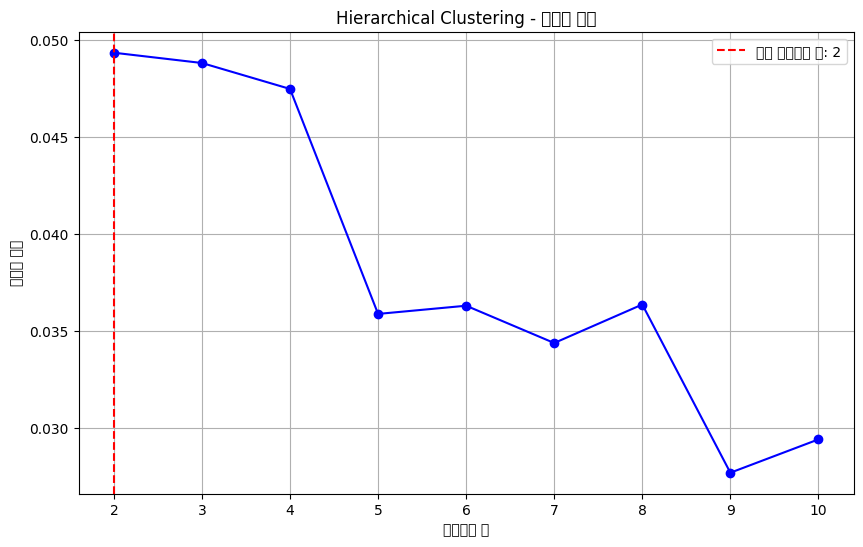


=== Hierarchical Clustering (n_clusters=2) ÏàòÌñâ Ï§ë... ===

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===

--- Hierarchical ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---
Cluster 0 (135Í∞ú): ÏºÄÏù¥ÌÅ¨, Ïª§Ìîº, ÎπµÏù¥, ÏûàÏñ¥ÏÑú, ÎßõÏûàÍ≤å, Í∞ÄÏÑ±ÎπÑ, ÏûêÏ£º, Í∞ôÏïÑÏöî
Cluster 1 (80Í∞ú): Ïª§Ìîº, Ïª§ÌîºÎèÑ, ÎÑìÍ≥†, Î∂ÑÏúÑÍ∏∞, Î∂ÑÏúÑÍ∏∞ÎèÑ, Ï¢ãÏùÄ, ÎîîÏ†ÄÌä∏, ÏûàÏñ¥ÏÑú

=== Hierarchical Clustering Í≤∞Í≥º ÏöîÏïΩ ===
Hierarchical
0    135
1     80
Name: count, dtype: int64


/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


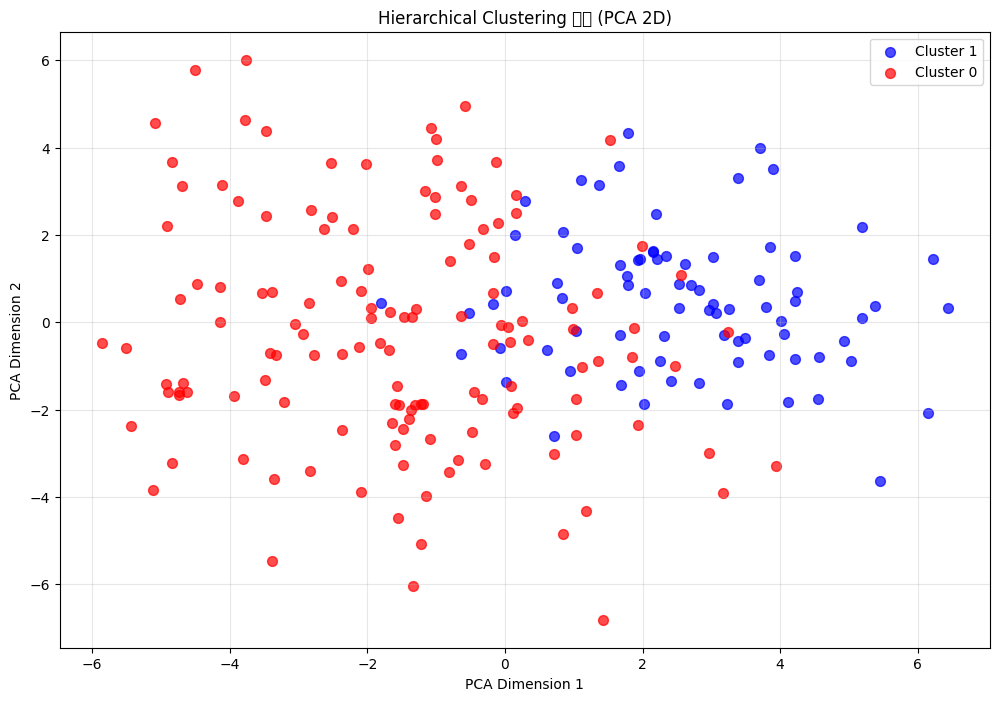


=== Hierarchical Clustering ÏÉÅÏÑ∏ Î∂ÑÏÑù ===

--- Cluster 0 ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---
Îç∞Ïù¥ÌÑ∞ Ïàò: 135Í∞ú
Ï£ºÏöî Ïπ¥Ìéò: TAKEN COFFEE Í±¥ÎåÄÌõÑÎ¨∏Ï†êÏπ¥Ìéò,ÎîîÏ†ÄÌä∏, ÏïÑÏò§Ïä§ÏöîÍ±∞Ìä∏, Ïõ®Ïù¥Îπô Ï†§ÎùºÎòê
ÏÉòÌîå Î¶¨Î∑∞:
  1. Ï†ÄÏùò ÏµúÏï†Ïª§ÌîºÏßëÏù¥ÏóêÏöî Ï†êÏã¨Ïóê Ìï≠ÏÉÅ Î∞îÏÅúÎç∞ÎèÑ 
 Îäò ÏπúÏ†àÌï¥Ïöî ÏùåÎ£å Î©îÎâ¥Í∞Ä ÏóÑÏ≤≠ 
 ÎßéÏùÄÎç∞ Ï†úÍ∞Ä Î®πÏñ¥Î≥∏Í±∞Îäî Îã§ Í¥úÏ∞ÆÏïÑÏöî 
 ÏßÄÏ†êÏù¥ ÎßéÏù¥ ÏÉùÍ∏∞Í≥† ÏûàÎäî Í≤É 
 Í∞ôÏïÑÏÑú Ï¢ãÎÑ§Ïöî ÌõÑÎ¨∏ ÌÖåÏù¥ÌÅ∞Ïª§Ìîº Ïò§ÎûúÎßåÏóê 
 Ï∞æÏïÑÍ∞îÏñ¥Ïöî~ Ïó¨Ï†ÑÌûà ÏïÑÎäëÌïú Îã§ÎùΩÎ∞© Î∂ÑÏúÑÍ∏∞„Öé„Öé 
 ÏòàÏ†ÑÏóî ÎîîÏ†ÄÌä∏ÎèÑ ÏûàÏóáÎäîÎç∞ Ïù¥Ï†† ÏùåÎ£åÎßå 
 ÏûàÎÑ§Ïöî Î©îÎâ¥ Îã§ÏñëÌïòÍ≥† Í∞ÄÍ≤© Ïó¨Ï†ÑÌûà 
 Ï∞©Ìï©ÎãàÎã§ „Öé ÌôîÏû•Ïã§ÏùÄ ÎπÑÏ∂îÍ≥† (Ïô∏Î∂Ä 
 Í±¥Î¨ºÏóê ÏûàÏùå) ÎßàÍ∞êÎèÑ ÎÑ§Ïù¥Î≤ÑÏóê Ïç®ÏûàÎäî 
 23Ïãú ÏïÑÎãàÍ≥† 22Ïãú ÏûÖÎãàÎã§! ÏïÑÏÉ∑Ï∂î 
 ~ Ïò§ÎûúÎßåÏóê ÎßàÏÖîÎ¥ÖÎãàÎã§. Ïó¨Ï†ÑÌûà Ï¢ãÎÑ§Ïöî! 
 ÏûòÎêòÏÖîÏÑú Í∞ÄÍ≤å Îçî ÎÇ¥Ï£ºÏãúÎ©¥ Ï¢ãÍ≤†Îã§„ÖéÏ†ÄÍ∞ÄÌòï 
 Ïπ¥ÌéòÎì§Î≥¥Îã® ÎßõÏù¥ ÌôïÏã§Ìûà ÎÇ´Í≥† ÏûêÏ£º 
 Í∞ÄÍ∏∞ Ïù¥Î≤àÏ£º ÎÇ¥ÎÇ¥ Í∞îÍ≥† Ïä§ÌÉ¨Ì

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['ÏûÑÎ≤†Îî©']])

print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞ (Ïã§Î£®Ïó£ Î∂ÑÏÑù)
print("\n=== ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÌÉêÏÉâ ===")
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò {n_clusters}: Ïã§Î£®Ïó£ Ï†êÏàò {score:.3f}")

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏÑ†ÌÉù
optimal_n = cluster_range[np.argmax(silhouette_scores)]
print(f"\nÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_n}")

# Ïã§Î£®Ïó£ Ï†êÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò')
plt.ylabel('Ïã§Î£®Ïó£ Ï†êÏàò')
plt.title('Hierarchical Clustering - Ïã§Î£®Ïó£ Î∂ÑÏÑù')
plt.axvline(x=optimal_n, color='red', linestyle='--', label=f'ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_n}')
plt.legend()
plt.grid(True)
plt.show()

# ÏµúÏ¢Ö Hierarchical Clustering ÏàòÌñâ
print(f"\n=== Hierarchical Clustering (n_clusters={optimal_n}) ÏàòÌñâ Ï§ë... ===")
hierarchical = AgglomerativeClustering(n_clusters=optimal_n, linkage='ward')
df['Hierarchical'] = hierarchical.fit_predict(embeddings)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===")

# TF-IDF Î≤°ÌÑ∞Ìôî
stop_words = ['ÎÑàÎ¨¥', 'Ï¢ãÏïÑÏöî', 'ÎßõÏûàÏñ¥Ïöî', 'Ï†ïÎßê', 'Ï¢ãÍ≥†', 'ÎßõÏûàÍ≥†', 'ÏßÑÏßú', '„Öé„Öé', 'Í∞ÄÍ≤å', 'Ïπ¥Ìéò', 'Í≥≥']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

print(f"\n--- Hierarchical ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---")

for cluster in sorted(df['Hierarchical'].unique()):
    cluster_indices = df[df['Hierarchical'] == cluster].index
    
    if len(cluster_indices) == 0:
        continue
        
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
    top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
    
    cluster_size = len(cluster_indices)
    print(f"Cluster {cluster} ({cluster_size}Í∞ú): {', '.join(top_keywords)}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ
print("\n=== Hierarchical Clustering Í≤∞Í≥º ÏöîÏïΩ ===")
print(df['Hierarchical'].value_counts().sort_index())

# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

unique_clusters = df['Hierarchical'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['Hierarchical'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster % len(colors)], label=f'Cluster {cluster}', alpha=0.7, s=50)

plt.title('Hierarchical Clustering Í≤∞Í≥º (PCA 2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ÏÉÅÏÑ∏ Î∂ÑÏÑù
print(f"\n=== Hierarchical Clustering ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
for cluster in sorted(df['Hierarchical'].unique()):
    print(f"\n--- Cluster {cluster} ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---")
    cluster_data = df[df['Hierarchical'] == cluster]
    
    print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(cluster_data)}Í∞ú")
    
    # Ï£ºÏöî Ïπ¥Ìéò
    if len(cluster_data) > 0:
        top_cafes = cluster_data['Ïπ¥ÌéòÏù¥Î¶Ñ'].value_counts().head(3)
        print(f"Ï£ºÏöî Ïπ¥Ìéò: {', '.join(top_cafes.index.tolist())}")
        
        # ÏÉòÌîå Î¶¨Î∑∞
        print("ÏÉòÌîå Î¶¨Î∑∞:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Rdata_hierarchical_clustered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nHierarchical Clustering Í≤∞Í≥ºÍ∞Ä '{output_file}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ
print(f"\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ ===")
cluster_stats = df.groupby('Hierarchical').agg({
    'Ïπ¥ÌéòÏù¥Î¶Ñ': 'nunique',
    'filtered_review': 'count'
}).rename(columns={'Ïπ¥ÌéòÏù¥Î¶Ñ': 'Ïπ¥Ìéò Ïàò', 'filtered_review': 'Î¶¨Î∑∞ Ïàò'})

print(cluster_stats)

--------------

Kmeans ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌèâÍ∞Ä

Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: Apple SD Gothic Neo
Îç∞Ïù¥ÌÑ∞ Ïàò: 215
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768

=== K-Means ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÌÉêÏÉâ ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 2: Ïã§Î£®Ïó£ Ï†êÏàò 0.067, Í¥ÄÏÑ± 14869.86
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 3: Ïã§Î£®Ïó£ Ï†êÏàò 0.063, Í¥ÄÏÑ± 14267.26
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 4: Ïã§Î£®Ïó£ Ï†êÏàò 0.051, Í¥ÄÏÑ± 13782.27
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 5: Ïã§Î£®Ïó£ Ï†êÏàò 0.040, Í¥ÄÏÑ± 13431.03
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 6: Ïã§Î£®Ïó£ Ï†êÏàò 0.034, Í¥ÄÏÑ± 13214.16
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 7: Ïã§Î£®Ïó£ Ï†êÏàò 0.032, Í¥ÄÏÑ± 12995.80
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 8: Ïã§Î£®Ïó£ Ï†êÏàò 0.033, Í¥ÄÏÑ± 12785.29
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 9: Ïã§Î£®Ïó£ Ï†êÏàò 0.025, Í¥ÄÏÑ± 12574.78
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 10: Ïã§Î£®Ïó£ Ï†êÏàò 0.026, Í¥ÄÏÑ± 12401.68

Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2


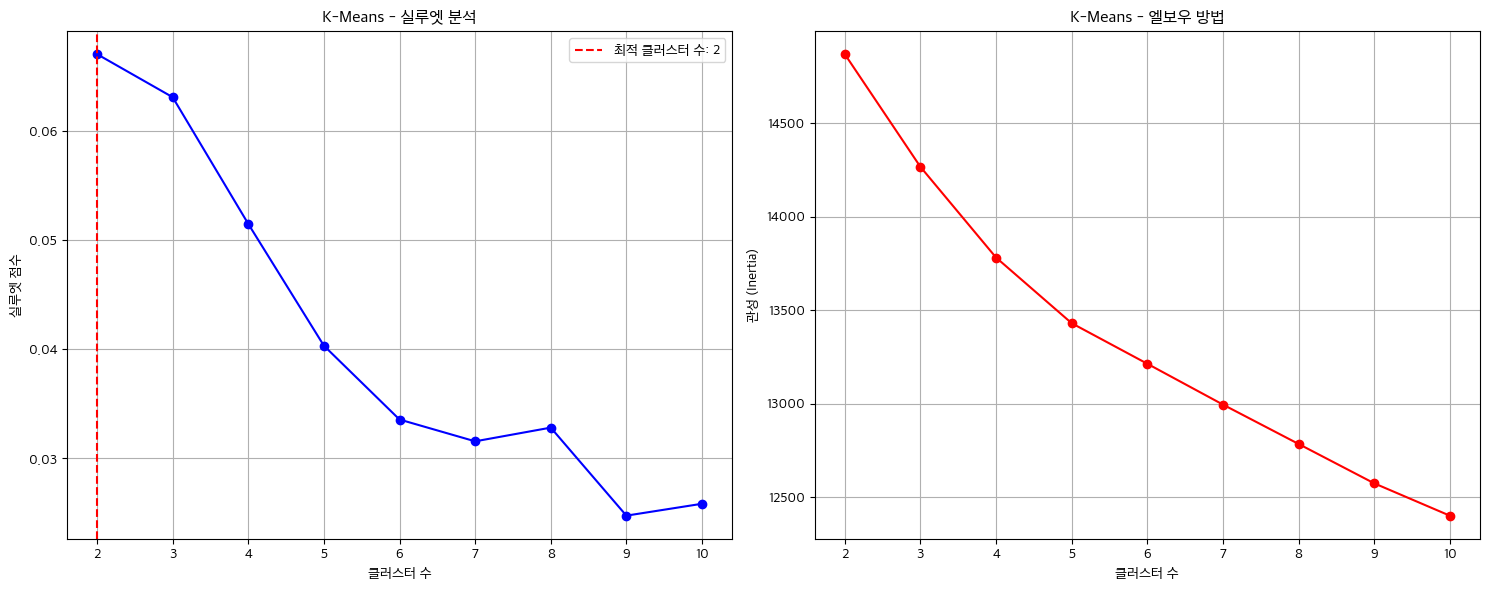

ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 4

ÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2

=== K-Means Clustering (n_clusters=2) ÏàòÌñâ Ï§ë... ===

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===

--- K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---
Cluster 0 (96Í∞ú): Ïª§Ìîº, Ïª§ÌîºÎèÑ, ÎÑìÍ≥†, Î∂ÑÏúÑÍ∏∞, Ï¢ãÏùÄ, Ïª§ÌîºÍ∞Ä, Î∂ÑÏúÑÍ∏∞ÎèÑ, ÏûàÏñ¥ÏÑú
Cluster 1 (119Í∞ú): ÏºÄÏù¥ÌÅ¨, ÎπµÏù¥, ÎßõÏûàÍ≤å, ÏûàÏñ¥ÏÑú, ÎßõÏûàÏóàÏñ¥Ïöî, ÏûêÏ£º, ÎßõÏûàÏñ¥ÏÑú, Í∞ôÏïÑÏöî

=== K-Means Clustering Í≤∞Í≥º ÏöîÏïΩ ===
KMeans
0     96
1    119
Name: count, dtype: int64


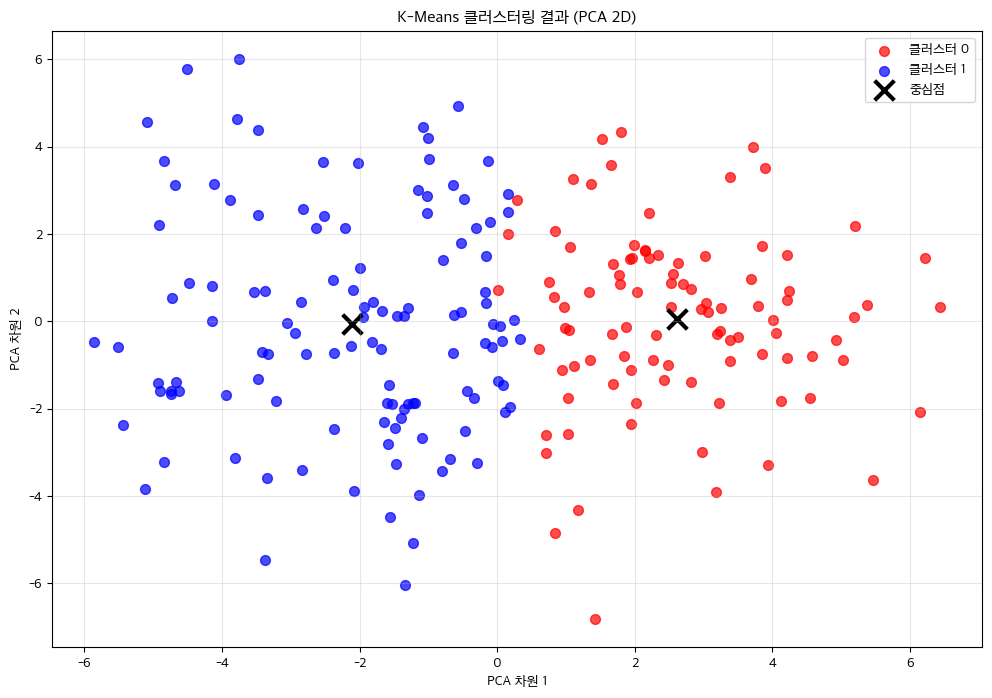


=== K-Means Clustering ÏÉÅÏÑ∏ Î∂ÑÏÑù ===

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---
Îç∞Ïù¥ÌÑ∞ Ïàò: 96Í∞ú
Ï£ºÏöî Ïπ¥Ìéò: FFEE, TAKEN COFFEE Í±¥ÎåÄÌõÑÎ¨∏Ï†êÏπ¥Ìéò,ÎîîÏ†ÄÌä∏, Ïπ¥ÌéòÎìúÎùºÏù¥Ïπ¥Ìéò,ÎîîÏ†ÄÌä∏
ÏÉòÌîå Î¶¨Î∑∞:
  1. ÏïÑÎ©îÎùºÏπ¥ÎÖ∏ ÏõêÎëê ÏÑ∏Í∞ÄÏßÄ Ï§ëÏóê Í≥†Î•º 
 Ïàò ÏûàÏñ¥ÏÑú Ï∑®Ìñ•Ïóê ÎßûÍ≤å Î®πÏùÑ 
 Ïàò ÏûàÏñ¥ Ï¢ãÏïÑÏöî. Î¨ºÎ°† ÎßõÎèÑ 
 Ï¢ãÍµ¨Ïöî! Î∞îÎãêÎùºÎπàÎùºÎñºÎûë ÌúòÎÇ≠ÏãúÏóêÎûë ÏóêÍ∑∏ÌÉÄÎ•¥Ìä∏ÎèÑ Îã§ 
 ÎßõÏûàÏñ¥ÏÑú ÌóàÍ≤ÅÏßÄÍ≤Å Î®πÏóàÎÑ§Ïöî„Öã„Öã +Îã¥Ïöî, Íπ®ÎÅóÌïú 
 ÌôîÏû•Ïã§, ÏóâÎî∞ÎπÑÎç∞ ÏµúÍ≥†! Ïπ¥Ìéò ÏïàÏóê 
 ÏïÑÎäëÌïòÍ≥† ÍΩ§ ÎÑìÏùÄ Í≥µÍ∞ÑÏù¥ ÏûàÏñ¥ 
 Ìé∏ÌïòÍ≤å ÎåÄÌôîÌïòÍ∏∞ Ï¢ãÏïòÏäµÎãàÎã§! ÌúòÎÇ≠ÏãúÏóêÎèÑ ÎßõÏûàÏóàÍ≥† 
 ÏñºÍ∑∏Î†àÏù¥Ìã∞ÎèÑ ÏßÑÌï¥ÏÑú Ï¢ãÏïòÏñ¥Ïöî :) Îã§ÏùåÎ≤àÏóêÎäî 
 ÌîºÏä§ÌÉÄÏπòÏò§ ÎùºÎñº ÎßàÏãúÎü¨ Ïò¨Í≤åÏöî ~ 
 Ìï≠ÏÉÅ ÏßÄÎÇò Îã§ÎãàÎçò Í≥≥Ïù∏Îç∞ Ïù¥Îü∞ 
 Í≥≥Ïóê Ïπ¥ÌéòÍ∞Ä ÏûàÎäîÏßÄ Ï≤òÏùå ÏïåÏïòÏñ¥Ïöî. 
 ÏïΩÍ∞Ñ ÎÇòÎßåÏùò Ïà®ÏùÄ Í≥µÍ∞Ñ ÎäêÎÇå 
 Ïª§ÌîºÎèÑ ÏßÅÏõê Î∂ÑÎì§ÎèÑ ÏπúÏ†àÌïòÍ≥† Îòê 
 Ïò¨ Í≤É Í∞ôÏäµÎãàÎã§ ÌåùÏóÖ Ïõ®Ïù¥ÌåÖÌïòÎü¨ 
 Ïò§Í≤å Îêú Ïπ¥Ìé

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Îß• ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    """Îß•ÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï"""
    if platform.system() == 'Darwin':  # macOS
        # Îß•ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌïúÍ∏Ä Ìè∞Ìä∏Îì§
        font_list = [
            '/System/Library/Fonts/AppleSDGothicNeo.ttc',  # Ïï†Ìîå ÏÇ∞ÎèåÍ≥†Îîï ÎÑ§Ïò§
            '/Library/Fonts/NanumGothic.ttf',              # ÎÇòÎàîÍ≥†Îîï (ÏÑ§ÏπòÎêú Í≤ΩÏö∞)
            '/System/Library/Fonts/Helvetica.ttc'          # Î∞±ÏóÖÏö©
        ]
        
        for font_path in font_list:
            try:
                font_prop = fm.FontProperties(fname=font_path)
                plt.rcParams['font.family'] = font_prop.get_name()
                print(f"Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: {font_prop.get_name()}")
                break
            except:
                continue
        
        # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
        plt.rcParams['axes.unicode_minus'] = False
    else:
        # WindowsÎÇò LinuxÏùò Í≤ΩÏö∞
        plt.rcParams['font.family'] = 'DejaVu Sans'
        plt.rcParams['axes.unicode_minus'] = False

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ï†ÅÏö©
set_korean_font()

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Rdata_bert.csv")
embeddings = np.array([eval(emb) for emb in df['ÏûÑÎ≤†Îî©']])

print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞ (Ïã§Î£®Ïó£ Î∂ÑÏÑù + ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
print("\n=== K-Means ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÌÉêÏÉâ ===")
cluster_range = range(2, 11)
silhouette_scores = []
inertias = []  # ÏóòÎ≥¥Ïö∞ Î∞©Î≤ïÏö©

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    
    # Ïã§Î£®Ïó£ Ï†êÏàò
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    
    # Í¥ÄÏÑ± (ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
    inertias.append(kmeans.inertia_)
    
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò {n_clusters}: Ïã§Î£®Ïó£ Ï†êÏàò {score:.3f}, Í¥ÄÏÑ± {kmeans.inertia_:.2f}")

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏÑ†ÌÉù (Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä)
optimal_n_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"\nÏã§Î£®Ïó£ Ï†êÏàò Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_n_silhouette}")

# ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Ïã§Î£®Ïó£ Ï†êÏàò Í∑∏ÎûòÌîÑ
ax1.plot(cluster_range, silhouette_scores, 'bo-')
ax1.set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò')
ax1.set_ylabel('Ïã§Î£®Ïó£ Ï†êÏàò')
ax1.set_title('K-Means - Ïã§Î£®Ïó£ Î∂ÑÏÑù')
ax1.axvline(x=optimal_n_silhouette, color='red', linestyle='--', 
           label=f'ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_n_silhouette}')
ax1.legend()
ax1.grid(True)

# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï Í∑∏ÎûòÌîÑ
ax2.plot(cluster_range, inertias, 'ro-')
ax2.set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò')
ax2.set_ylabel('Í¥ÄÏÑ± (Inertia)')
ax2.set_title('K-Means - ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï')
ax2.grid(True)

plt.tight_layout()
plt.show()

# ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏ Ï∞æÍ∏∞ (Í∞ÑÎã®Ìïú Î∞©Î≤ï)
def find_elbow_point(inertias):
    # Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏßÄÏ†ê Ï∞æÍ∏∞
    diffs = np.diff(inertias)
    diffs2 = np.diff(diffs)
    elbow_point = np.argmax(diffs2) + 2  # +2Îäî Ïù∏Îç±Ïä§ Î≥¥Ï†ï
    return elbow_point

optimal_n_elbow = find_elbow_point(inertias)
print(f"ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï Í∏∞Ï§Ä ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_n_elbow}")

# ÏµúÏ¢Ö ÏÑ†ÌÉù: Ïã§Î£®Ïó£ Ï†êÏàò Ïö∞ÏÑ†
final_n_clusters = optimal_n_silhouette
print(f"\nÏµúÏ¢Ö ÏÑ†ÌÉùÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {final_n_clusters}")

# ÏµúÏ¢Ö K-Means Clustering ÏàòÌñâ
print(f"\n=== K-Means Clustering (n_clusters={final_n_clusters}) ÏàòÌñâ Ï§ë... ===")
kmeans_final = KMeans(n_clusters=final_n_clusters, random_state=42, n_init=10)
df['KMeans'] = kmeans_final.fit_predict(embeddings)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Î∂ÑÏÑù ===")

# TF-IDF Î≤°ÌÑ∞Ìôî
stop_words = ['ÎÑàÎ¨¥', 'Ï¢ãÏïÑÏöî', 'ÎßõÏûàÏñ¥Ïöî', 'Ï†ïÎßê', 'Ï¢ãÍ≥†', 'ÎßõÏûàÍ≥†', 'ÏßÑÏßú', '„Öé„Öé', 'Í∞ÄÍ≤å', 'Ïπ¥Ìéò', 'Í≥≥']
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    ngram_range=(1, 2), 
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

print(f"\n--- K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌÇ§ÏõåÎìú ---")

for cluster in sorted(df['KMeans'].unique()):
    cluster_indices = df[df['KMeans'] == cluster].index
    
    if len(cluster_indices) == 0:
        continue
        
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:8]
    top_keywords = [feature_names[i] for i in top_indices if cluster_tfidf[0, i] > 0]
    
    cluster_size = len(cluster_indices)
    print(f"Cluster {cluster} ({cluster_size}Í∞ú): {', '.join(top_keywords)}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏöîÏïΩ
print("\n=== K-Means Clustering Í≤∞Í≥º ÏöîÏïΩ ===")
print(df['KMeans'].value_counts().sort_index())

# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

unique_clusters = df['KMeans'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['KMeans'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster % len(colors)], label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}', alpha=0.7, s=50)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ï†êÎèÑ ÌëúÏãú
cluster_centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
           c='black', marker='x', s=200, linewidths=3, label='Ï§ëÏã¨Ï†ê')

plt.title('K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (PCA 2D)')
plt.xlabel('PCA Ï∞®Ïõê 1')
plt.ylabel('PCA Ï∞®Ïõê 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ÏÉÅÏÑ∏ Î∂ÑÏÑù
print(f"\n=== K-Means Clustering ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
for cluster in sorted(df['KMeans'].unique()):
    print(f"\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster} ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ---")
    cluster_data = df[df['KMeans'] == cluster]
    
    print(f"Îç∞Ïù¥ÌÑ∞ Ïàò: {len(cluster_data)}Í∞ú")
    
    # Ï£ºÏöî Ïπ¥Ìéò
    if len(cluster_data) > 0:
        top_cafes = cluster_data['Ïπ¥ÌéòÏù¥Î¶Ñ'].value_counts().head(3)
        print(f"Ï£ºÏöî Ïπ¥Ìéò: {', '.join(top_cafes.index.tolist())}")
        
        # ÏÉòÌîå Î¶¨Î∑∞
        print("ÏÉòÌîå Î¶¨Î∑∞:")
        sample_reviews = cluster_data['filtered_review'].head(3)
        for i, review in enumerate(sample_reviews):
            print(f"  {i+1}. {review}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ï†êÍ≥ºÏùò Í±∞Î¶¨ Î∂ÑÏÑù
print(f"\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ï†ê Î∂ÑÏÑù ===")
for cluster in sorted(df['KMeans'].unique()):
    cluster_indices = df[df['KMeans'] == cluster].index
    cluster_embeddings = embeddings[cluster_indices]
    center = kmeans_final.cluster_centers_[cluster]
    
    # Ï§ëÏã¨Ï†êÍ≥ºÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞
    distances = np.linalg.norm(cluster_embeddings - center, axis=1)
    
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}:")
    print(f"  ÌèâÍ∑† Í±∞Î¶¨: {np.mean(distances):.3f}")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {np.std(distances):.3f}")
    print(f"  ÏµúÎåÄ Í±∞Î¶¨: {np.max(distances):.3f}")

# Í≤∞Í≥º Ï†ÄÏû•
output_file = "Rdata_kmeans_clustered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\nK-Means Clustering Í≤∞Í≥ºÍ∞Ä '{output_file}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ
print(f"\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ ===")
cluster_stats = df.groupby('KMeans').agg({
    'Ïπ¥ÌéòÏù¥Î¶Ñ': 'nunique',
    'filtered_review': 'count'
}).rename(columns={'Ïπ¥ÌéòÏù¥Î¶Ñ': 'Ïπ¥Ìéò Ïàò', 'filtered_review': 'Î¶¨Î∑∞ Ïàò'})

print(cluster_stats)

# ÏÑ±Îä• Î©îÌä∏Î¶≠ ÏöîÏïΩ
print(f"\n=== ÏµúÏ¢Ö ÏÑ±Îä• Î©îÌä∏Î¶≠ ===")
final_silhouette = silhouette_score(embeddings, df['KMeans'])
print(f"ÏµúÏ¢Ö Ïã§Î£®Ïó£ Ï†êÏàò: {final_silhouette:.3f}")
print(f"ÏµúÏ¢Ö Í¥ÄÏÑ±: {kmeans_final.inertia_:.2f}")
print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {final_n_clusters}")